In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LinearRegression import LinearRegression as myLR

In [3]:
df = pd.read_csv('salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


(24, 1)

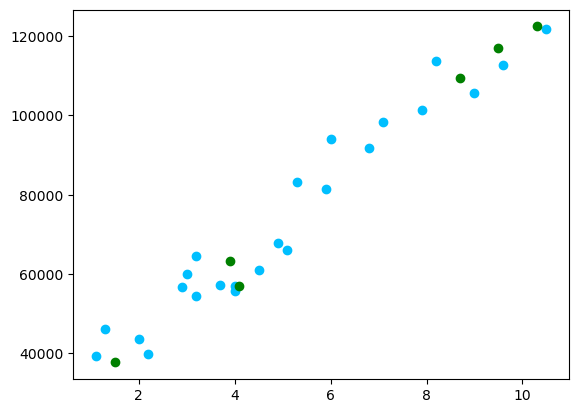

In [4]:
X = df[['YearsExperience']].values
y = df[['Salary']].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

plt.scatter(X_train,y_train,color='deepskyblue');
plt.scatter(X_test,y_test,color='green');
X_train.shape

In [5]:
my_model = myLR(learning_rate = 0.03, iterations = 1000)
my_model.fit(X_train,y_train)
print(f"Weights = {my_model.W}")
print(f"Bias = {my_model.b}")

Iteration 0, Loss: 6073909419.708333
Iteration 50, Loss: 1180867335.8856738
Iteration 100, Loss: 254631479.85135007
Iteration 150, Loss: 78273330.71684168
Iteration 200, Loss: 44394257.53940726
Iteration 250, Loss: 37798691.74652231
Iteration 300, Loss: 36489504.24383676
Iteration 350, Loss: 36222476.07151748
Iteration 400, Loss: 36166013.22918542
Iteration 450, Loss: 36153531.42380565
Iteration 500, Loss: 36150629.96196699
Iteration 550, Loss: 36149919.86584187
Iteration 600, Loss: 36149737.58628396
Iteration 650, Loss: 36149688.87335926
Iteration 700, Loss: 36149675.44032649
Iteration 750, Loss: 36149671.65005111
Iteration 800, Loss: 36149670.563308574
Iteration 850, Loss: 36149670.24832756
Iteration 900, Loss: 36149670.15637829
Iteration 950, Loss: 36149670.12941121
Weights = [[9312.59435567]]
Bias = [26779.97272408]


In [6]:
y_pred = my_model.predict(X_test)
print(y_pred)

[[ 40748.86425759]
 [122699.69458748]
 [ 64961.60958233]
 [ 63099.0907112 ]
 [115249.61910295]
 [107799.54361841]]


Loss : 12823144.07130491


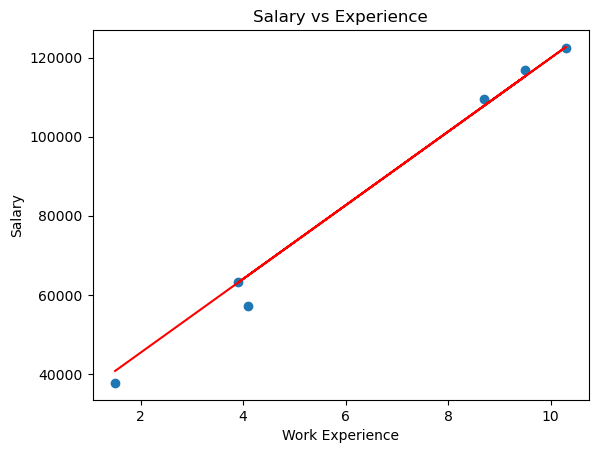

In [7]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red')
plt.title('Salary vs Experience')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
print(f"Loss : {my_model.compute_loss(y_pred,y_test)}")

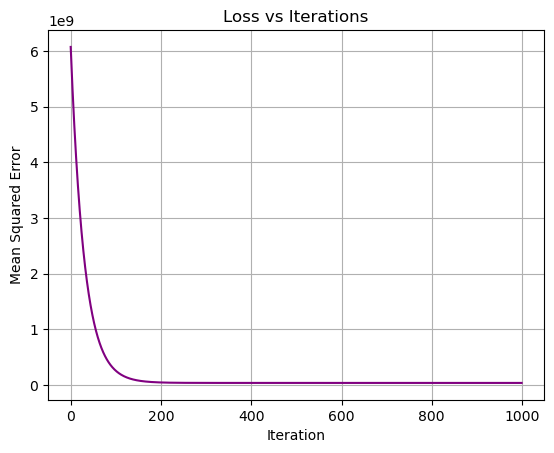

In [8]:
plt.plot(my_model.loss_history, color='purple')
plt.title("Loss vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

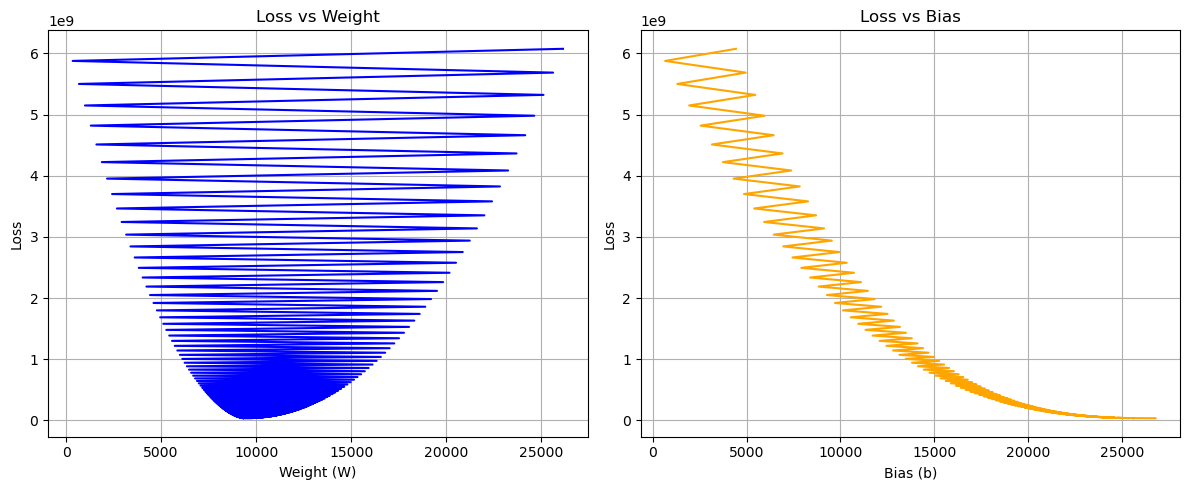

In [9]:
W_vals = [w[0][0] for w in my_model.W_history]
b_vals = [b[0] for b in my_model.b_history]
loss_vals = my_model.loss_history

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(W_vals, loss_vals, color='blue')
plt.title("Loss vs Weight")
plt.xlabel("Weight (W)")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(b_vals, loss_vals, color='orange')
plt.title("Loss vs Bias")
plt.xlabel("Bias (b)")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()

Loss : 12823412.298126506
[[ 40748.86425759]
 [122699.69458748]
 [ 64961.60958233]
 [ 63099.0907112 ]
 [115249.61910295]
 [107799.54361841]]


Text(0, 0.5, 'Salary')

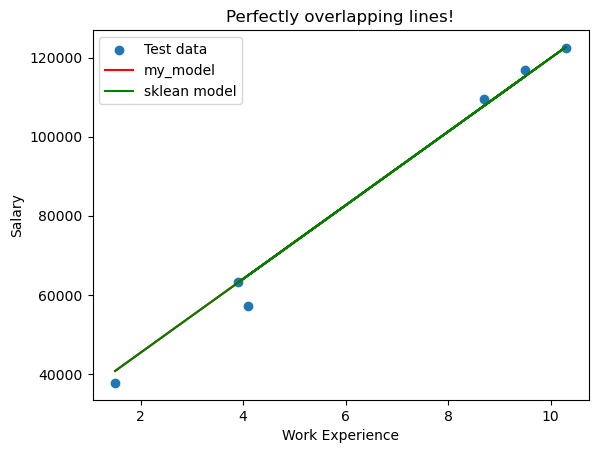

In [10]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

model = LR()
model.fit(X_train,y_train)
y_pred_sk = model.predict(X_test)
print(f"Loss : {mse(y_pred_sk,y_test)}")
print(y_pred)
plt.scatter(X_test,y_test,label='Test data')
plt.plot(X_test,y_pred,color='red',label = 'my_model')
plt.plot(X_test,y_pred_sk,color='green',label = 'sklean model')
plt.title('Perfectly overlapping lines!')
plt.legend()
plt.xlabel('Work Experience')
plt.ylabel('Salary')